In [1]:
import pandas as pd
# Read in api key from file
with open('api_key.txt', 'r') as f:
    api_key = f.read()

### Demo how to use functions in spoontacular.py

In [2]:
import spoontacular
pizza = spoontacular.get_recipe("pizza", api_key)
pizza

,id,title,image,imageType
0,1090114,pizza,https://spoonacular.com/recipeImages/1090114-3...,jpg
1,210327,Pizza,https://spoonacular.com/recipeImages/210327-31...,jpg
2,108172,Pizza,https://spoonacular.com/recipeImages/108172-31...,jpg
3,172154,Pizza Dip,https://spoonacular.com/recipeImages/172154-31...,jpg
4,508123,Pizza Dip,https://spoonacular.com/recipeImages/508123-31...,jpg
5,1696869,Pizza Dip,https://spoonacular.com/recipeImages/1696869-3...,jpg
6,1067382,Pizza Dip,https://spoonacular.com/recipeImages/1067382-3...,jpg
7,248459,Pizza Dip,https://spoonacular.com/recipeImages/248459-31...,jpg
8,527345,Pizza Dip,https://spoonacular.com/recipeImages/527345-31...,jpg
9,831392,Pizza Dip,https://spoonacular.com/recipeImages/831392-31...,jpg


In [3]:
first_pizza_id = pizza.iloc[0]['id']
pizza_taste = spoontacular.get_taste(first_pizza_id, api_key)
pizza_taste

{'sweetness': 1.13,
 'saltiness': 10.42,
 'sourness': 3.68,
 'bitterness': 3.34,
 'savoriness': 7.4,
 'fattiness': 7.0,
 'spiciness': 0.0}

### Do some PCA analysis on the taste profile of 5 types of food

In [4]:
# Build a dataframe of 10 random recipes for 5 types of food
food_type = ["pizza", "burger", "salad", "soup", "dessert"]

all_recipes = pd.DataFrame()
for food in food_type:
    recipes = spoontacular.get_recipe(food, api_key)
    # Add food type as a column
    recipes['food_type'] = food
    all_recipes = all_recipes.append(recipes)
# Get taste profile for each recipe
all_recipes['taste_profile'] = all_recipes.apply(lambda row: spoontacular.get_taste(row['id'], api_key), axis=1)


In [5]:
# Extract flavors from taste profile
# From dictionary to separate columns in dataframe
flavors = ['sweetness','saltiness','sourness','bitterness','savoriness','fattiness','spiciness']
recipeswithflavor = all_recipes.copy()
for falvor in flavors:
    recipeswithflavor[falvor] = all_recipes['taste_profile'].apply(lambda row: row[falvor])
recipeswithflavor.head()

,id,title,image,imageType,food_type,taste_profile,sweetness,saltiness,sourness,bitterness,savoriness,fattiness,spiciness
0,1090114,pizza,https://spoonacular.com/recipeImages/1090114-3...,jpg,pizza,"{'sweetness': 1.13, 'saltiness': 10.42, 'sourn...",1.13,10.42,3.68,3.34,7.40,7.00,0.00
1,210327,Pizza,https://spoonacular.com/recipeImages/210327-31...,jpg,pizza,"{'sweetness': 1.34, 'saltiness': 0.65, 'sourne...",1.34,0.65,1.40,0.41,0.50,1.94,0.00
2,108172,Pizza,https://spoonacular.com/recipeImages/108172-31...,jpg,pizza,"{'sweetness': 1.14, 'saltiness': 2.12, 'sourne...",1.14,2.12,0.48,0.43,1.51,3.26,0.00
3,172154,Pizza Dip,https://spoonacular.com/recipeImages/172154-31...,jpg,pizza,"{'sweetness': 0.53, 'saltiness': 1.23, 'sourne...",0.53,1.23,1.07,0.48,0.20,3.66,2483.33
4,508123,Pizza Dip,https://spoonacular.com/recipeImages/508123-31...,jpg,pizza,"{'sweetness': 1.06, 'saltiness': 4.93, 'sourne...",1.06,4.93,1.98,0.98,0.88,4.34,930.00


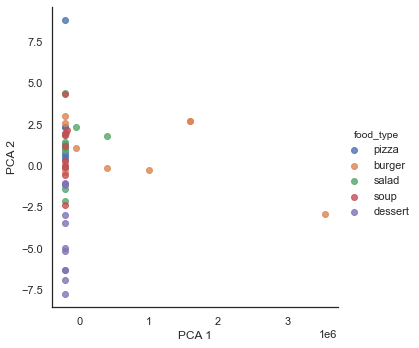

In [38]:
%matplotlib inline
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
pca.fit(recipeswithflavor[flavors])
# Scatter plot of the two components
# With color based on food type
# with log x-axis
pca_components = pca.transform(recipeswithflavor[flavors])
# Add food type as a column
pca_df = pd.DataFrame({"PCA 1":pca_components[:,0],
                "PCA 2":pca_components[:,1],
                "food_type":recipeswithflavor['food_type']})
import seaborn as sns
sns.set(style="white")
sns.lmplot(x="PCA 1", y="PCA 2", hue="food_type", data=pca_df, fit_reg=False)
